In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from utils import get_top_municipalities_from_demopgraphics, aggregate_counts

### Global variables

In [2]:
CWD = Path.cwd()
DATA_PATH = CWD.parent / "data"
DATA_PATH

PosixPath('/Users/rasmus.siljander/hands-on-network-analysis/data')

### Municipality demographic data

`municipality_demographic_data.csv` contains demographic data about different municipalities.

In [3]:
data = pd.read_csv(DATA_PATH / "municipality_demographic_data.csv", sep=";", header=1)
data.head()

,Alue 2020,Tiedot,1987,1988,1989,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,KOKO MAA,"Taajama-aste, %",77.7,77.7,78.1,80.6,80.7,80.8,80.9,81.1,...,84.1,84.2,84.6,84.9,85.1,85.4,85.6,85.8,86.1,86.4
1,KOKO MAA,Väkiluku,4938602,4954359,4974383,4998478,5029002,5054982,5077912,5098754,...,5375276.0,5401267.0,5426674.0,5451270.0,5471753.0,5487308.0,5503297.0,5513130.0,5517919.0,5525292
2,KOKO MAA,"Väkiluvun muutos edellisestä vuodesta, %",..,0.3,0.4,0.5,0.6,0.5,0.5,0.4,...,0.4,0.5,0.5,0.5,0.4,0.3,0.3,0.2,0.1,0.1
3,KOKO MAA,"Alle 15-vuotiaiden osuus väestöstä, %",19.3,19.4,19.3,19.3,19.2,19.2,19.1,19.1,...,16.5,16.5,16.4,16.4,16.4,16.3,16.2,16.2,16.0,15.8
4,KOKO MAA,"15-64 -vuotiaiden osuus väestöstä, %",67.8,67.5,67.4,67.2,67.2,67.1,67.0,66.8,...,66.0,65.4,64.8,64.2,63.7,63.2,62.9,62.5,62.2,62.0


We can, for example, extract 2020 municipality populations from the dataframe:

In [4]:
top_10_municipalities = get_top_municipalities_from_demopgraphics(data)
top_10_municipalities.to_csv(DATA_PATH / "populations_top10.csv", index=False)
top_10_municipalities

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/Users/rasmus.siljander/hands-on-network-analysis/src/utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_populations["municipality"] = top_populations["municipality"].str.replace(


,municipality,population
0,Helsinki,653835
1,Espoo,289731
2,Tampere,238140
3,Vantaa,233775
4,Oulu,205489
5,Turku,192962
6,Jyväskylä,142400
7,Lahti,119823
8,Kuopio,119282
9,Pori,83934


### Domestic migration

Let's take a look at the 2020 data:

In [11]:
migration_2020 = pd.read_csv(DATA_PATH / "mobility_by_year/2020.csv")
migration_2020

,Area of arrival,Area of departure,Total 2020 Intermunicipal migration,Males 2020 Intermunicipal migration,Females 2020 Intermunicipal migration
0,Arrival - Akaa,Departure - Akaa,0,0.1,0.2
1,Arrival - Akaa,Departure - Alaj�rvi,0,0.0,0.0
2,Arrival - Akaa,Departure - Alavieska,0,0.0,0.0
3,Arrival - Akaa,Departure - Alavus,0,0.0,0.0
4,Arrival - Akaa,Departure - Asikkala,0,0.0,0.0
...,...,...,...,...,...
95476,Arrival - ��nekoski,Departure - Ylivieska,0,0.0,0.0
95477,Arrival - ��nekoski,Departure - Yl�j�rvi,0,0.0,0.0
95478,Arrival - ��nekoski,Departure - Yp�j�,1,0.0,1.0
95479,Arrival - ��nekoski,Departure - �ht�ri,1,0.0,1.0


We are interested in seeing what **net migration** was in the **10 largest municipalities**. To do that, we need to do filtering and aggregate the results:

In [13]:
arrival_top10 = aggregate_counts(migration_2020, top_10_municipalities, column="Area of arrival")
arrival_top10

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Total,Males,Females
Arrival - Espoo,18331.0,9360.0,8971.0
Arrival - Helsinki,35032.0,16646.0,18386.0
Arrival - Jyväskylä,8478.0,4099.0,4379.0
Arrival - Kuopio,6445.0,2982.0,3463.0
Arrival - Lahti,5986.0,2826.0,3160.0
Arrival - Oulu,9705.0,4649.0,5056.0
Arrival - Pori,3328.0,1574.0,1754.0
Arrival - Tampere,17182.0,8024.0,9158.0
Arrival - Turku,12983.0,6102.0,6881.0
Arrival - Vantaa,19490.0,10081.0,9409.0


In [14]:
departure_top10 = aggregate_counts(
    migration_2020, top_10_municipalities, column="Area of departure"
)
departure_top10.index = departure_top10.index.str.replace("Departure - ", "")
departure_top10

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Total,Males,Females
Espoo,18933.0,9563.0,9370.0
Helsinki,36076.0,17770.0,18306.0
Jyväskylä,8100.0,3851.0,4249.0
Kuopio,5767.0,2700.0,3067.0
Lahti,5781.0,2729.0,3052.0
Oulu,9086.0,4440.0,4646.0
Pori,3382.0,1639.0,1743.0
Tampere,15088.0,7286.0,7802.0
Turku,12324.0,5768.0,6556.0
Vantaa,18451.0,9286.0,9165.0


And aggregating the results:

In [11]:
df_mapping = {
    "departures_total": departure_top10["Total"],
    "arrivals_total": arrival_top10["Total"],
    "departures_female": departure_top10["Females"],
    "arrivals_female": arrival_top10["Females"],
    "departures_male": departure_top10["Males"],
    "arrivals_male": arrival_top10["Males"],
}

migration_2020_top10 = pd.DataFrame(df_mapping, index=arrival_top10.index.rename("Area"))
groups = ["total", "male", "female"]

for sex_group in groups:
    migration_2020_top10[f"net_migration_{sex_group}"] = (
        migration_2020_top10[[f"departures_{sex_group}", f"arrivals_{sex_group}"]]
        .diff(axis=1)
        .iloc[:, -1]
    )
    migration_2020_top10[f"total_movement_{sex_group}"] = migration_2020_top10[
        [f"departures_{sex_group}", f"arrivals_{sex_group}"]
    ].sum(axis=1)


migration_2020_top10 = migration_2020_top10.reindex(
    top_10_municipalities["municipality"]
)  # reorder
migration_2020_top10.to_csv(DATA_PATH / "migration_aggregated_top10_2020.csv")
migration_2020_top10

,departures_total,arrivals_total,departures_female,arrivals_female,departures_male,arrivals_male,net_migration_total,total_movement_total,net_migration_male,total_movement_male,net_migration_female,total_movement_female
municipality,,,,,,,,,,,,
Helsinki,36076,35032,18306.0,18386.0,17770.0,16646.0,-1044,71108,-1124.0,34416.0,80.0,36692.0
Espoo,18933,18331,9370.0,8971.0,9563.0,9360.0,-602,37264,-203.0,18923.0,-399.0,18341.0
Tampere,15088,17182,7802.0,9158.0,7286.0,8024.0,2094,32270,738.0,15310.0,1356.0,16960.0
Vantaa,18451,19490,9165.0,9409.0,9286.0,10081.0,1039,37941,795.0,19367.0,244.0,18574.0
Oulu,9086,9705,4646.0,5056.0,4440.0,4649.0,619,18791,209.0,9089.0,410.0,9702.0
Turku,12324,12983,6556.0,6881.0,5768.0,6102.0,659,25307,334.0,11870.0,325.0,13437.0
Jyväskylä,8100,8478,4249.0,4379.0,3851.0,4099.0,378,16578,248.0,7950.0,130.0,8628.0
Lahti,5781,5986,3052.0,3160.0,2729.0,2826.0,205,11767,97.0,5555.0,108.0,6212.0
Kuopio,5767,6445,3067.0,3463.0,2700.0,2982.0,678,12212,282.0,5682.0,396.0,6530.0


We can plot this as bar plots:

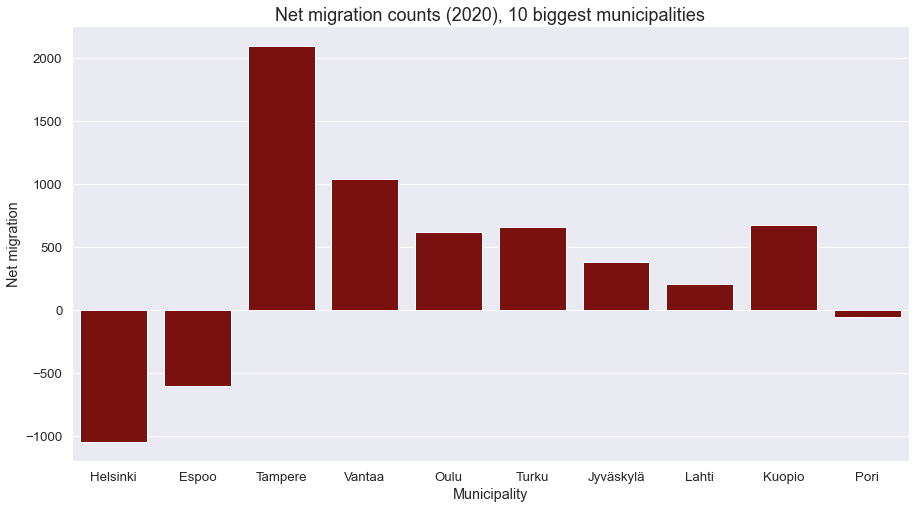

In [12]:
fig = plt.figure(figsize=(15, 8))
sns.set(font_scale=1.2)
bar = sns.barplot(
    x=migration_2020_top10.index,
    y="net_migration_total",
    data=migration_2020_top10,
    color="darkred",
)
bar.set_title("Net migration counts (2020), 10 biggest municipalities", fontsize=18)
bar.set_xlabel("Municipality")
bar.set_ylabel("Net migration")
fig.savefig(CWD.parent / "images/net_migration_total_2020.png")

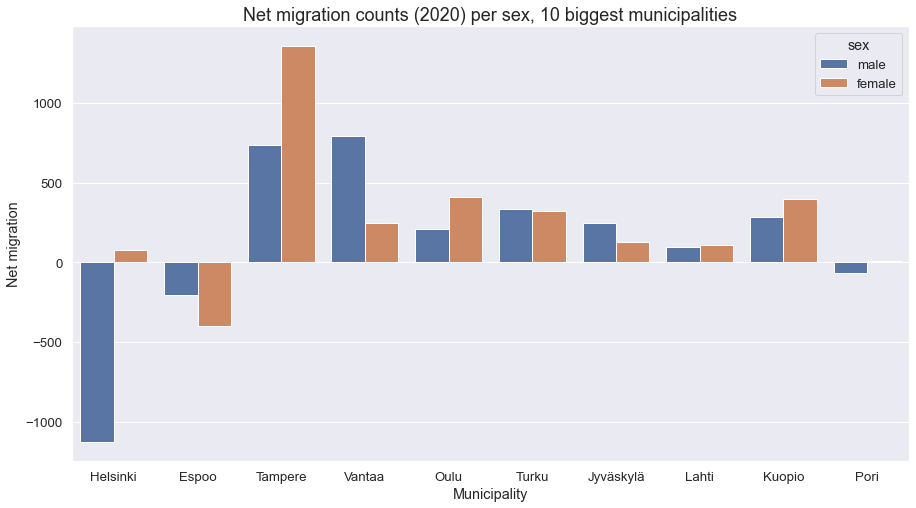

In [13]:
migration_sex_ungrouped = pd.DataFrame(
    migration_2020_top10["net_migration_male"].append(
        migration_2020_top10["net_migration_female"]
    ),
    columns=["net_migration"],
)

sex = np.full(migration_sex_ungrouped.shape[0], "female")
sex[:10] = "male"
migration_sex_ungrouped["sex"] = sex
migration_sex_ungrouped

fig = plt.figure(figsize=(15, 8))
sns.set(font_scale=1.2)
bar = sns.barplot(
    x=migration_sex_ungrouped.index, y="net_migration", data=migration_sex_ungrouped, hue="sex"
)
bar.set_title("Net migration counts (2020) per sex, 10 biggest municipalities", fontsize=18)
bar.set_xlabel("Municipality")
bar.set_ylabel("Net migration")
fig.savefig(CWD.parent / "images/net_migration_per_sex_2020.png")

## Aggregating time-series data 

In [11]:
# Used in cleanup f

# if yr == "2019":
#     print(data)
#     # print(arrival)
#     print(data[data["Area of departure"].isna()])
# data = pd.read_csv(file, sep = ",", header=1)
# replace_dict = {
#     "^Arrival - Jyv.*" : "Arrival - Jyväskylä",
#     "Departure - Jyv" : "Departure - Jyväskylä"
# }
# data = data.replace(replace_dict, regex=True)
# data.to_csv(file, index=False)

In [18]:
ts_filepaths = sorted((DATA_PATH / "mobility_by_year").glob("*"))
num_municipalities = 10
net_migration_ts = pd.DataFrame()

for file in ts_filepaths[:]:
    filename = str(file).split("/")[-1]
    yr = filename.split(".")[0]
    if int(yr) % 5 == 0:  # print progress
        print(yr)

    data = pd.read_csv(file, sep=",", header=0)
    arrival = aggregate_counts(data, top_10_municipalities, column="Area of arrival")
    arrival.index = arrival.index.str.replace("Arrival - ", "")

    departure = aggregate_counts(data, top_10_municipalities, column="Area of departure")
    departure.index = arrival.index.str.replace("Departure - ", "")

    df_mapping = {
        "departures_total": departure["Total"],
        "arrivals_total": arrival["Total"],
        "departures_female": departure["Females"],
        "arrivals_female": arrival["Females"],
        "departures_male": departure["Males"],
        "arrivals_male": arrival["Males"],
    }

    migration = pd.DataFrame(df_mapping, index=arrival.index.rename("Area"))

    groups = ["total", "male", "female"]

    for sex_group in groups:
        migration[f"net_migration_{sex_group}"] = (
            migration[[f"departures_{sex_group}", f"arrivals_{sex_group}"]]
            .diff(axis=1)
            .iloc[:, -1]
        )
        net_migration_ts[f"{sex_group}_{yr}"] = (
            migration[[f"departures_{sex_group}", f"arrivals_{sex_group}"]]
            .diff(axis=1)
            .iloc[:, -1]
        )

        migration[f"sum_migration_{sex_group}"] = migration[
            [f"departures_{sex_group}", f"arrivals_{sex_group}"]
        ].sum(axis=1)

# net_migration_ts.to_csv(DATA_PATH / "net_migration_time_series.csv")
net_migration_ts

1990


/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


1995
2000
2005
2010
2015
2020


,total_1990,male_1990,female_1990,total_1991,male_1991,female_1991,total_1992,male_1992,female_1992,total_1993,...,female_2017,total_2018,male_2018,female_2018,total_2019,male_2019,female_2019,total_2020,male_2020,female_2020
Area,,,,,,,,,,,,,,,,,,,,,
Espoo,481,166.0,315.0,581,288,293,916,450,466,1283,...,800,1427,828,599,2535,1236,1299,-602,-203.0,-399.0
Helsinki,-928,-481.0,-447.0,349,-37,386,-47,55,-102,2895,...,2851,2459,673,1786,1726,446,1280,-1044,-1124.0,80.0
Jyväskylä,120,47.0,73.0,262,77,185,402,254,148,156,...,361,838,388,450,600,296,304,378,248.0,130.0
Kuopio,116,87.0,29.0,326,136,190,172,123,49,138,...,196,378,167,211,576,238,338,678,282.0,396.0
Lahti,-253,-94.0,-159.0,-208,-160,-48,-173,-105,-68,-134,...,-43,297,244,53,-114,-101,-13,205,97.0,108.0
Oulu,137,117.0,20.0,-3,38,-41,299,158,141,13,...,133,511,273,238,518,163,355,619,209.0,410.0
Pori,-259,-115.0,-144.0,-135,-44,-91,-325,-149,-176,5,...,-183,3,48,-45,-164,-59,-105,-54,-65.0,11.0
Tampere,408,153.0,255.0,604,266,338,750,308,442,768,...,1521,2626,1179,1447,1917,762,1155,2094,738.0,1356.0
Turku,-940,-600.0,-340.0,-504,-217,-287,-214,-163,-51,-176,...,858,1301,582,719,1383,506,877,659,334.0,325.0


In [19]:
migration

,departures_total,arrivals_total,departures_female,arrivals_female,departures_male,arrivals_male,net_migration_total,sum_migration_total,net_migration_male,sum_migration_male,net_migration_female,sum_migration_female
Area,,,,,,,,,,,,
Espoo,18933,18331,9370.0,8971.0,9563.0,9360.0,-602,37264,-203.0,18923.0,-399.0,18341.0
Helsinki,36076,35032,18306.0,18386.0,17770.0,16646.0,-1044,71108,-1124.0,34416.0,80.0,36692.0
Jyväskylä,8100,8478,4249.0,4379.0,3851.0,4099.0,378,16578,248.0,7950.0,130.0,8628.0
Kuopio,5767,6445,3067.0,3463.0,2700.0,2982.0,678,12212,282.0,5682.0,396.0,6530.0
Lahti,5781,5986,3052.0,3160.0,2729.0,2826.0,205,11767,97.0,5555.0,108.0,6212.0
Oulu,9086,9705,4646.0,5056.0,4440.0,4649.0,619,18791,209.0,9089.0,410.0,9702.0
Pori,3382,3328,1743.0,1754.0,1639.0,1574.0,-54,6710,-65.0,3213.0,11.0,3497.0
Tampere,15088,17182,7802.0,9158.0,7286.0,8024.0,2094,32270,738.0,15310.0,1356.0,16960.0
Turku,12324,12983,6556.0,6881.0,5768.0,6102.0,659,25307,334.0,11870.0,325.0,13437.0


## Total migration time-series data

In [15]:
are_total = net_migration_ts.columns.str.contains("total")
cols_keep = list(net_migration_ts.columns[are_total].values)
net_ts = net_migration_ts[cols_keep]
net_ts

,total_1990,total_1991,total_1992,total_1993,total_1994,total_1995,total_1996,total_1997,total_1998,total_1999,...,total_2011,total_2012,total_2013,total_2014,total_2015,total_2016,total_2017,total_2018,total_2019,total_2020
Area,,,,,,,,,,,,,,,,,,,,,
Espoo,481,581,916,1283,1668,2881,2853,2548,2134,2638,...,690,582,22,1061,1238,1640,1366,1427,2535,-602
Helsinki,-928,349,-47,2895,4245,6194,5490,4649,4745,3367,...,1643,3173,4086,3645,3564,3285,5027,2459,1726,-1044
Jyväskylä,120,262,402,156,581,544,690,560,476,714,...,271,338,192,247,723,632,833,838,600,378
Kuopio,116,326,172,138,111,145,-91,-33,-303,-115,...,151,647,666,729,564,518,348,378,576,678
Lahti,-253,-208,-173,-134,154,-35,-78,10,161,174,...,373,387,-68,170,-58,546,49,297,-114,205
Oulu,137,-3,299,13,934,1646,1383,816,1313,1677,...,679,687,852,582,506,227,334,511,518,619
Pori,-259,-135,-325,5,-78,-191,-147,-231,-293,-316,...,18,154,79,58,11,-112,-334,3,-164,-54
Tampere,408,604,750,768,2278,2545,2449,1801,1799,1203,...,735,969,1690,1488,938,2146,2815,2626,1917,2094
Turku,-940,-504,-214,-176,1584,1825,1658,1244,1506,815,...,540,813,994,852,1137,909,1535,1301,1383,659


### The same data transposed

Useful for plotting as time-series.

In [16]:
net_ts_T = net_ts.T

yrs = np.arange(1990, 2021, 1)
net_ts_T.index = yrs

net_ts_T.to_csv(DATA_PATH / "net_migration_time_series.csv")
net_ts_T

Area,Espoo,Helsinki,Jyväskylä,Kuopio,Lahti,Oulu,Pori,Tampere,Turku,Vantaa
1990,481,-928,120,116,-253,137,-259,408,-940,578
1991,581,349,262,326,-208,-3,-135,604,-504,86
1992,916,-47,402,172,-173,299,-325,750,-214,-348
1993,1283,2895,156,138,-134,13,5,768,-176,106
1994,1668,4245,581,111,154,934,-78,2278,1584,1376
1995,2881,6194,544,145,-35,1646,-191,2545,1825,300
1996,2853,5490,690,-91,-78,1383,-147,2449,1658,455
1997,2548,4649,560,-33,10,816,-231,1801,1244,689
1998,2134,4745,476,-303,161,1313,-293,1799,1506,776
1999,2638,3367,714,-115,174,1677,-316,1203,815,876


#### Sum migration time-series

### Absoulte migrations

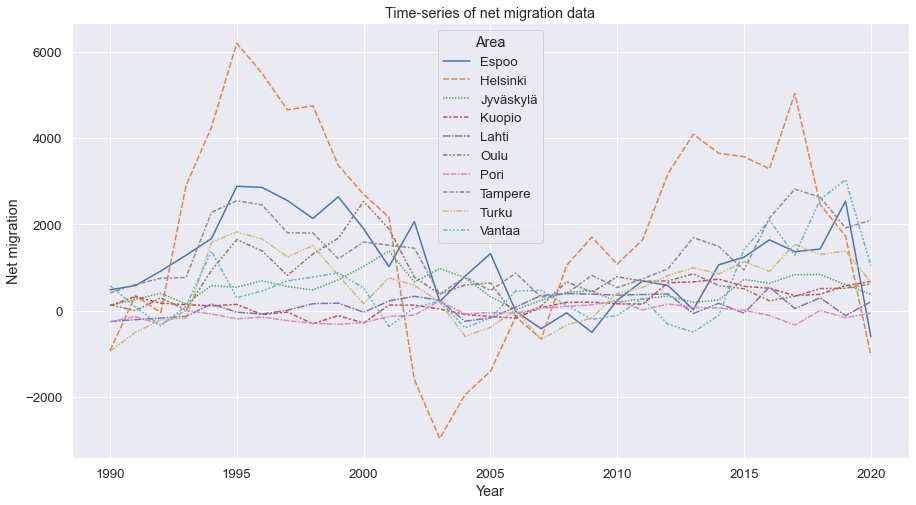

In [15]:
fig = plt.figure(figsize=(15, 8))
sns.set(font_scale=1.2)
lines = sns.lineplot(data=net_ts_T)
lines.set_xlabel("Year")
lines.set_ylabel("Net migration")
lines.set_title("Time-series of net migration data")
plt.show()
fig.savefig(CWD.parent / "images/net_migration_timeseries.png")

### Migration data normalized by population

In [16]:
net_ts_normalized = net_ts_T.copy()
for _, row in top_10_municipalities.iterrows():
    municip, pop = row
    net_ts_normalized.loc[:, municip] = (net_ts_T[municip] / pop) * 100

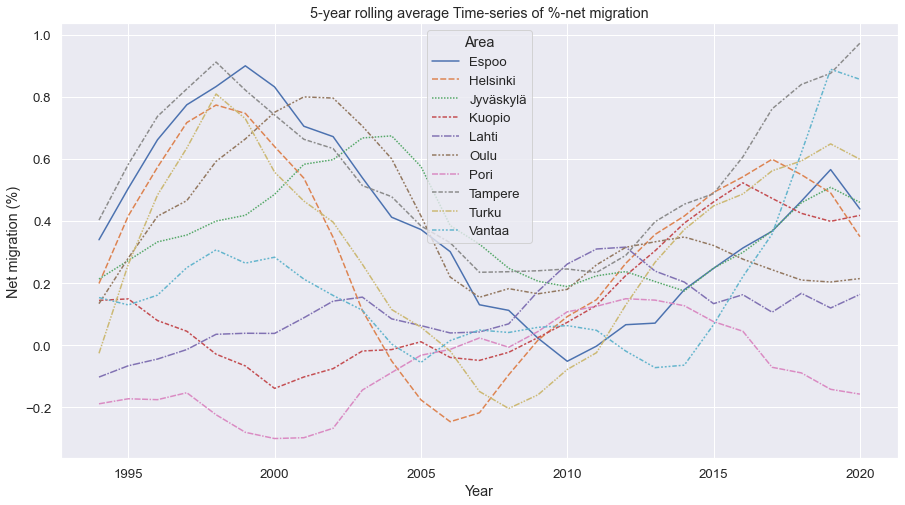

In [17]:
fig = plt.figure(figsize=(15, 8))
sns.set(font_scale=1.2)
lines = sns.lineplot(data=net_ts_normalized.rolling(5).mean())
lines.set_xlabel("Year")
lines.set_ylabel("Net migration (%)")
lines.set_title("5-year rolling average Time-series of %-net migration")
plt.show()
fig.savefig(CWD.parent / "images/net_migration_timeseries_percentages.png")

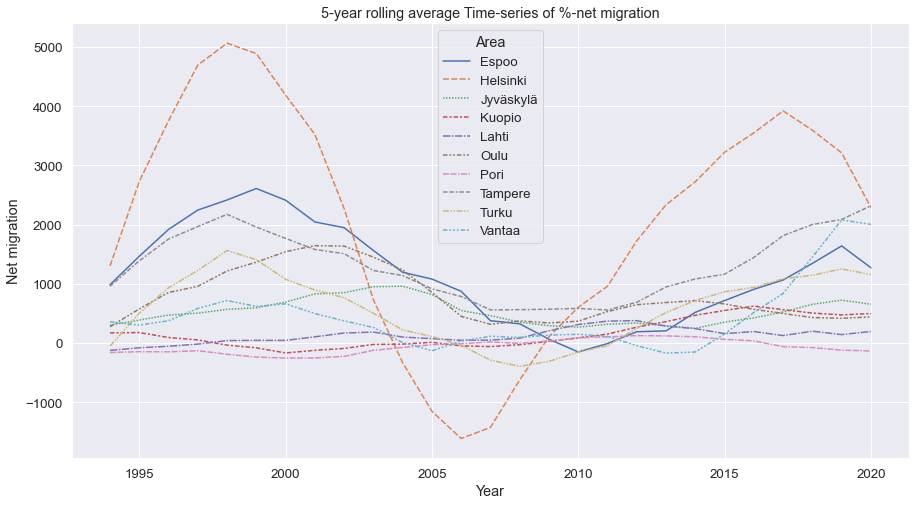

In [23]:
net_ts_T.rolling(3).mean()
fig = plt.figure(figsize=(15, 8))
sns.set(font_scale=1.2)
lines = sns.lineplot(data=net_ts_T.rolling(5).mean())
lines.set_xlabel("Year")
lines.set_ylabel("Net migration")
lines.set_title("5-year rolling average Time-series of %-net migration")
fig.savefig(CWD.parent / "images/net_migration_timeseries_rolling.png")

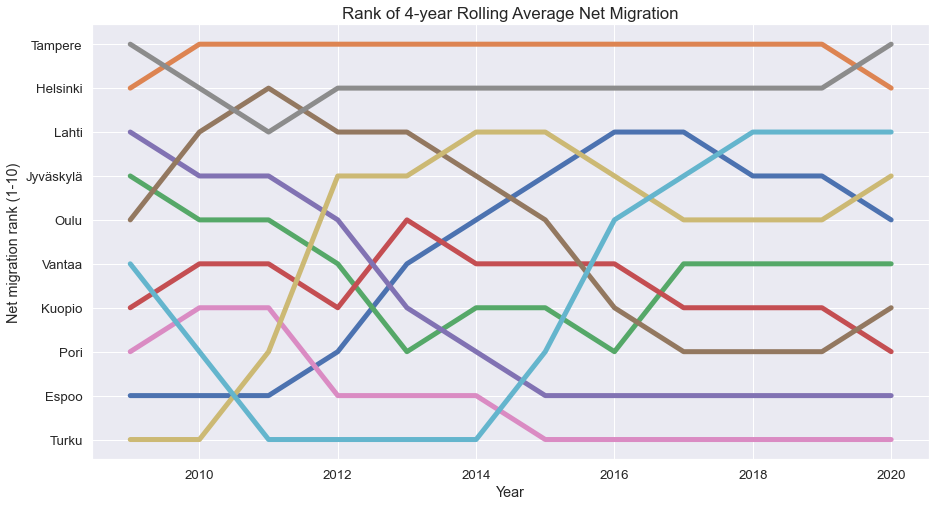

In [19]:
n_yrs = 15
n_rolling = 4
data_ts = net_ts_T.iloc[-n_yrs:, :]
ranks = data_ts.rolling(n_rolling).mean().rank(axis=1)

first_yr = ranks.iloc[n_rolling - 1]
first_yr.sort_values(ascending=False)
y_labels = first_yr.sort_values(ascending=True).index

fig = plt.figure(figsize=(15, 8))
ax = plt.gca()
sns.set(font_scale=1.4)
sns.lineplot(data=ranks, legend=False, ax=ax, linewidth=5)

for line in ax.lines:
    line.set_linestyle("-")

ax.set_yticks(np.arange(1, 11))
ax.set_yticklabels(y_labels)
ax.set_ylabel("Net migration rank (1-10)")
ax.set_xlabel("Year")
ax.set_title(f"Rank of {n_rolling}-year Rolling Average Net Migration")

plt.show()

fig.savefig(CWD.parent / "images/rank_net_migration_timeseries.png")